<font size="10">
    <div align="center">
        Técnicas y algoritmos de búsqueda
    </div>
</font>
<font size="6">
    <div align="center">
        Informe de la práctica 3
    </div>
    <br>

</font>
<font size="5">
    <div align="center">
        Gabriel Niculescu Ruso 
    </div>
    <div align="center">
        Carlos Molera Canals
    </div>
    <div align="center">
        Jose Francisco Pérez Mompeán
    </div>
</font>
<font size="5">
    <div align="right">
        29/05/2025
    </div>
</font>


<div>
    <hi><font size="9"><strong>Index</strong></font></hi>
    <ol>
        <li><font size="4">Alpha-Beta</font></li>
        <li><font size="4">Tabla de transposición</font></li>
        <li><font size="4">Función de Evaluación</font></li>
        <li><font size="4">La red</font></li>
        <li><font size="4">Testing</font></li>
    </ol>
</div>

## **3. FUNCIÓN DE EVALUACIÓN**

Una vez expuestas las metodologías empleadas en términos de ejercer la búsqueda, cabe señalar cuál es la función de evaluación en base a que estas últimas se nutren y apoyan. De manera concreta, a lo largo de esta sección se explorarán los siguientes apartados componentes:

<ol>
    <li>
        <strong>Introducción sobre los parámetros</strong>
    </li>
    <li>
        <strong>Explicación de las secciones</strong>
    </li>
    <li>
        <strong>La salida</strong>
    </li>
</ol>

### **3.1 Introducción sobre los parámetros**

Con relación a los parámetros de que nuestra función de evaluación se compone, podemos encontrar los que siguen:

**1.list_of_moves** **$\rightarrow$ list[str]**

Se expone como una lista componente en los últimos cuatro movimientos que Pacman ha desarrollado y que estarán codificados en términos de cadenas de texto en representación de los puntos cardinales. Con objeto de justificar su existencia de forma escuesta, encontramos que esta remite a la necesidad de escape frente a un bucle de movimientos que de manera posterior se explicará.<br><br>


**2.ghost_heat_map** **$\rightarrow$ dict[tuple[int,...], np.ndarray]**

Es un diccionario cuyas llaves codificarán las distintas posiciones que puede ocupar el fantasma y los valores denotarán el espectro de influencia que los enemigos pueden tener ante el layout que se ha seleccionado en la inicialización del agente con esa configuración posicional concreta. <br><br>

**3.current_heat_map** **$\rightarrow$ np.ndarray**

Es un array dispuesto para la evaluación de la peligrosidad estática de las celdas libres asociadas al mapa que hemos escogido en la llamada al Agente. De esta manera pues, localizamos que junto con el parámetro anterior lo que modelaremos será una métrica dinámica en representación de la peligrosidad relativa de las distintas posiciones que Pacman va adoptando.<br><br>


**4.original_food** **$\rightarrow$ list[int]**

Es un array en representación del número de capsulas de comida de que cada una de las particiones del mapa es componente; división espacial la cual se presentará más adelante. No obstante, cabe señalar que la aplicabilidad directa de este atributo ha sido derogada en base a una serie de razones inherentes al descarte del cálculo de las fuerzas que veremos posteriormente.<br><br>


**5.state** **$\rightarrow$ GameState**

Es una representación del estado actual del juego que nos permitirá el acceso a parámetros utilitarios tales como la posición de Pacman o la de los fantasmas,  e incluso valores como la puntuación y distribución global de la comida  para el ply con que trabajamos.

<div align = center>
    <img src = '../fotos/eval_function_init.png'>
</div>

### **3.2 Explicación de las secciones**

Tal y como habíamos dejado entreveer anteriormente, existen una serie de secciones en base a las cuales se construirá el cálculo final de nuestra función encargada de ejercer una evaluación sobre el estado actual.

Cabe señalar, no obstante, que se omitirá la parte del código referente a la obtención de las posiciones de los fantasmas y de Pacman en tanto que de manera explícita ya ha sido mencionado el cómo de su obtención anteriormente.



### ***SECURITY***

En esta sección lo que se buscará es calcular la distribución de peligrosidad en el mapa bajo el que trabajamos de tal forma que cada una de las casillas libres quede ponderada de base por un determinado factor de peligrosidad. 

Distinguimos dos partes claras en el proceso:<BR><br>


<u>**MAPA TOPOLÓGICO ESTÁTICO**</u>

De cara a lograr todo esto, encontramos que en primer lugar se generó un mapa de calor en representación del riesgo estático que a cada una  de las distintas zonas del grid se asociaba.

En lo que refiere a la construcción de dicha estructura, de manera particular se atribuyó un valor de peligrosidad $k \in \left\{0,5\right\}$ a cada una de las celdas y que vino dado en base a un criterio que inequívocamente se había de apoyar sobre la información topológica. 

Con objeto de explicar cuál ha sido este criterio espacial, localizamos que ha tenido su fundamento en el número de opciones posibles de movimiento con que Pacman contaba en cada momento. Consecuentemente, encontramos que las intersecciones entre caminos se presentarán como las zonas más seguras topológicamente, mientras que a medida que nos vamos acercando a las esquinas, dicho valor de seguridad va decrementado hasta que estas últimas son alcanzadas.

No obstante, también cabe señalar cuál es el modelo de evolución de la puntuación. En primer lugar, encontramos que, tal y como hemos mencionado, a las intersecciones se les atribuirá una puntuación de peligrosidad 0 que irá incrementando a medida que nos acerquemos a los extremos del mapa. Dicha ponderación crecerá hasta un valor que vendrá condicionado por la longitud del recorrido actual hasta las esquinas y que habrá de estar en concordancia con el flujo de puntuación que llega por parte de las otras vía de  comunicación. 

Si bien puede resultar confuso, veamos el siguiente ejemplo:



<div align = center>
    <img src = '../fotos/eval_mapa_calor.png'>
</div>

Como podemos observar, el valor mínimo irá progresando y creciendo en base a la metodología que anteriormente hemos descrito. No obstante, y entendiendo el mapa como un sistema recorrido por un fluido, si tenemos dos fuentes generadoras del mismo, llegará un punto en que ambas se encuentren y tengan que igualar fuerzas. Cabe señalar a su vez que el avance por cada una de las distintas fuentes (círculos blancos) se  produce a la misma velocidad y en todas las direcciones que los movimientos legales de Pacman permitan en cada momento. 

En esencia, lo que se pretendía recalcar con esta aclaración es el hecho de que por cuestiones de simetría los valores mínimos de seguridad que dentro del dominio definido se encuadran no siempre van a ser alcanzables en las esquinas.


<u>**COMPONENTE DINÁMICA**</u>

Expresado lo anterior, y dado que pretendíamos ejercer una evaluación global del peligro, se expuso como necesario el considerar el impacto que la presencia de los enemigos o fantasmas podría llegar a tener sobre la metodología de puntuación que en el primer apartado se ha establecido. 

Con ello, entenderemos al tipo fantasma como un campo con algún tipo de energía dispuesta y que,  a  medida que se va desplazando sobre las casillas ponderadas en base a la topología, va alterando su valor. Al igual que sucede en campos definidos en términos formales, el impacto o potencia del mismo irá variando a medida que nos vayamos alejando del foco emisor. Si bien campos como el eléctrico tienen un potencial que es cero en el infinito, lo que pretendíamos modelar era más el efecto de sumidero de peligrosidad  que el ceñirnos a lo que sería correcto desde un punto de vista teórico. 

Consecuentemente, encontramos que generaremos un modelado de rango de influencia limitado $r$, centrado en el fanstasma y cuyo valor variará en voluntad de adaptarse a la geometría y dimensiones de cada uno de los mapas dispuestos. Veamos pues una pareja de ejemplos de lo que el efecto de dicho fantasma supone en elecciones de grid distintas en una misma posición:<br><br>


<center><strong>1.MAPA MEDIUM CLASSIC</strong></center>

<center><strong>2.MAPA TRICKY CLASSIC</strong></center>

<div align = center>
    <img src ='../fotos/eval_ghosts_pos.png'>

</div>



Tal y como podemos observar, el rango de influencia o de impacto entre ambos mapas se expone como distinto del mismo modo que también lo son sus dimensiones; siendo  estas más elevadas en el mapa que presenta un mayor tamaño.

Finalmente, y en voluntad de exponer cómo dicho campo actúa sobre la evaluación estática antes ejercida, entendemos que simplemente se presentará como una combinación lineal de valores, esto es, una suma de los arrays representados en ambas metodologías de ponderación.

Sea pues esta la fórmula que codifica el valor de cada una de las celdas finales:<br><br>

$$\text{Final danger} = \text{Static Danger + Dynamic Danger}$$



Veamos a continuación un ejemplo de dicho impacto combinado para un fantasma centrado en la posición $(2,1)$ y bajo la elección del mapa $\text{Medium Classic}$. No obstante, antes de proseguir cabe señalar que el origen de coordenadas se encuentra en la esquina superior izquierda del grid:


<div align = center>
    <img src ='../fotos/eval_dynamic_vs_static.png'>

</div>

Como podemos observar, en la posición de centrado en el mapa izquierdo ha incrementado la peligrosidad como producto del impacto generado por parte de la presencia del fantasma; así como también lo ha hecho en las zonas que dentro de su rango de influencia se encuentran. Cabe matizar a su vez que la distribución de colores varía al atender a un nuevo máximo como producto de la introducción del dinamismo a la evaluación.

<u>**CÓDIGO**</u>


Finalmente, cabe señalar que los diccionarios que codifican los distintos mapas de calor estáticos y dinámicos estarán almacenados en un formato pickle para facilitar su carga desde el agente y su inyección como parámetro a la función de evaluación.

Matizado esto último, veamos una imagen asociada al código que ha sido empleado para desempeñar la tarea presentada en líneas anteriores:



<div align = center>
    <img src ='../fotos/eval_security.png'>

</div>

### ***MEAN-DANGER-CURRENT-QUADRANT***

A lo largo de esta sección lo que se buscará es el determinar la peligrosidad media de la comida presente en la división del mapa dentro de la cual Pacman se encuentra en el ply actual. 

Con ello, localizamos que los apartados construidos de cara a ejercer dicha labor son los que siguen:


<u>**DIVIDIENDO EL ESPACIO**</u>


Tal y como mencionábamos en la sección referente a la presentación de los parámetros, el mapa sufrirá una división en cuatro secciones o cuadrantes que atenderán a una partición esquitativa del espacio fundamentada bajo el trabajo con las dimensiones del layout. 

Si tomamos por ejemplo un $Layout = (x,y)$, entonces los valores en base a los cuales se van a segregar los cuadrantes serán los que siguen:

$$h = \lceil\frac{x}{2} \rceil $$
$$w = \lceil\frac{y}{2} \rceil $$




<div align = center>
    <table>
        <tr align=center>
            <td align=center> <strong>CUADRANTE<strong></td>
            <td> <strong>CONDICIÓN X<strong></td>
            <td> <strong>CONDICIÓN Y<strong></td>
        </tr>
        <tr align=center>
            <td> 1</td>
            <td> x less than h </td>
            <td> y less than w </td>
        </tr>
        <tr align=center>
            <td> 2</td>
            <td> x more equal than h </td>
            <td> y less than w </td>
        </tr>
        <tr align=center>
            <td> 3</td>
            <td> x more equal than h </td>
            <td> y more equal than w </td>
        </tr>
        <tr align=center>
            <td> 4</td>
            <td> x less than h </td>
            <td> y more equal than w </td>
        </tr>
    </table>
</div>

Una imagen asociada a dicha división en cuadrantes representada sobre el mapa mediumClassic sería la que sigue:

<div align = center>
    <img src ='../fotos/eval_quadrants.png'>

</div>

<u>**¿EN QUÉ CUADRANTE ESTÁ PACMAN?**</u>


Construida dicha partición, habremos de determinar cuál es el cuadrante concreto en que se encuentra Pacman en voluntad de poder ejercer el cálculo sobre la media de peligrosidad de las celdas de comida que localmente lo rodean. 

La justificación de la elección del cuadrante actual para este cálculo es que la función de evaluación adquiere un carácter estático y confiamos en la capacidad de la búsqueda para encontrar evaluaciones de Pacman en otros cuadrantes a medida que esta progresa.



<u>**MEDIA DE LA PELIGROSIDAD DE LA COMIDA DEL CUADRANTE**</u>

Simplemente se construirá como el sumatorio del riesgo dinámico asociado a cada una de las celdas con comida del cuadrante en que Pacman se encuentra actualmente partido por el total de este tipo de celdas. Sea por ejemplo el cuadrante $1$ con un total de $16$ celdas no vacías y un sumatorio de peligrosidad construido de la siguiente manera:

$$n_{celdas} = 16$$
$$danger = \sum_{i = 1}^{n_{celdas}}\text{mapa de peligrosidad}\ [i]$$

$$\text{Mean of danger}\ (\mu) = \frac{danger}{n_{celdas}}$$


Cabe señalar que el mapa de peligrosidad codifica la combinación del riesgo estático y dinámico que de manera anterior hemos expuesto.


<U>**CONCLUSIÓN Y VÍNCULO**</u>

En conclusión, esta métrica nos permitirá aplicar la concepción de seguridad desarrollada en el apartado anterior, a la par que obtener un estimador insesgado como es el de la media muestral para ponderar cómo de bueno es el cuadrante que actualmente ocupo en términos de la comida que en el mismo se encuadra. 

Valores muy elevados de peligrosidad media establecerán una alta voluntad de transición  hacia otros cuadrantes, mientras que términos más reducidos computarán el que se entienda el estado actual como uno no desfavorable.


### ***LOOKING FOR DENSITY***


Tal y como habíamos mencionado anteriormente, la consideración que ejerce la función de evaluación se desarrolla desde un punto de vista estático y por ende se tomará con respecto al cuadrante en que actualmente Pacman se encuentra.

Si bien antes hemos considerado la peligrosidad asociada a la distribución de la  comida en la región donde nos hayamos, otro de los factores relevantes del juego se presenta como la cantidad de la misma que somos capaces de comer en el menor tiempo posible. De ahí pues que surja la  necesidad de ponderar cuál es el punto caliente donde esta última está concentrada. 



<u>**CENTROIDE**</u>

Hilando lo descrito anteriormente, la categorización de la bondad de una posición dentro del cuadrante será, además de mi seguridad como jugador, la cercanía respecto a una mayor cantidad de cápsulas o de comida. 

Puesto que necesitábamos como tal considerar el impacto de la totalidad de las cápsulas sobre la posición actual, se decidió tomar una medida o equivalencia de la influencia que todas estas tienen en conjunto. Con ello, decidimos que el cálculo del centroide de la distribución de las cápsulas se presentaba como idóneo puesto que nos permitía considerar un punto caliente único que era media de la posición de todas las cápsulas pertenecientes a la división actual.

Sea pues la siguiente fórmula empleada para su cálculo y asumiendo la disposición de un set de comida  $S \left\{(x,y), \forall x,y \in \N ^+ \right\}$ en el cuadrante actual:

$$\text{Centroid}\ (x_c, y_c) = \frac{\sum_{i = 1}^{|S|} S_i}{|N|} \in \N^+$$

De esta manera, disponemos de una heurística o guía que nos permite dictaminar de forma dinámica cuál es ese punto en el cual tengo más posibilidades de alcanzar una mayor cantidad de cápsulas. Dicha atribución del adjetivo "dinámico" radica en que se irá actualizando a medida que vayamos consumiendo y por ende desplazándose hacia las zonas de mayor densidad o interés.



<div align = center>
    <img src ='../fotos/eval_centroid.jpg'>

</div>

<u>**DISTANCIA DE MANHATTAN**</u>

Una vez obtenido dicho valor, se computará el desplazamiento horizontal y vertical ideal respecto al centroide calculado de manera previa, esto es, la Distancia de Manhattan. Con ello, lo que pretenderemos penalizar es el estar alejados de ese punto caliente que sobre la distribución de comida se ha generado.

$$Manhattan(a,b) = |a_x - b_x| + |a_y - b_y|$$
Cabe señalar a su vez que en el cálculo de dicha distancia no se ha tenido en consideración la existencia de obstáculos físicos de ningún tipo y por ende la métrica obtenida es un ideal que se aleja de la realidad en ese aspecto. 

En el caso de la imagen anterior por ejemplo, la distancia de Manhattan respecto al centroide se presentaría como de $2$; penalización la cual se expondría como muy reducida dada la proximidad al foco de comida de la partición.

### ***REPEATING MOVES***



La existencia de esta sección surge en la materia que Pacman cae en ciertas ocasiones en un bucle de movimientos del tipo **north-south** o **west-east** que repite hasta que un fantasma se encuentra lo suficientemente cerca como para romperlo.

Las causas exactas de este fenómeno no son claras ni definidas, pero tenemos las siguientes hipótesis:


1. El centroide cae en lugares centrales del cuadrante al estar distribuida la comida por los extremos del mismo y por ende Pacman queda atrapado en dicha posición.

2. Si queda poca o ninguna comida en el cuadrante y Pacman está alejado de otras particiones, la búsqueda no tiene la suficiente profundidad como para determinar el estado del jugador en los cuadrantes distantes. Consecuentemente, no le queda otra opción más que moverse de forma incoherente o  repetir movimientos en bucle. 



<u>**SOLUCIÓN**</u>

Con voluntad de paliar esto último, y tal y como mencionábamos en la inicialización, hemos atribuido al hecho de que se repitan secuencias de movimientos una penalización de tal forma que se descarten las ramas en que estos últimos se producen.

No obstante, hay que tener cuidado con este tipo de castigo. La razón fundamental para la exigencia de prudencia es que, de ser muy severa la penalización, Pacman considerará como una opción menos mala el ser comido por un fantasma y por ende finalizar el juego. Si bien todo este razonamiento era la idea inicial, la aplicación práctica no ha terminado de ser fructífera en el aspecto para el cual fue creada. 



<div align = center>
    <img src ='../fotos/eval_repeating_movs.png'>

</div>

### ***REWARDING FOOD***


Con voluntad de incidir más profundamente sobre una idea que de manera implícita hemos estado desarrollando, diríamos que el  juego de Pacman en esencia se presenta como un equilibrio. Es la búsqueda de un balance constante entre ingerir toda la comida presente y aguantar lo máximo posible con vida en la partida, teniendo la victoria como objetivo último.

En lo que respecta al segundo de los aspectos, y gracias a las funciones desarrolladas en términos de la evaluación de la peligrosidad, estamos bien cubiertos. No obstante, necesitamos de un catalizador en lo que el consumo de comida refiere y que no se limite únicamente a la acción atractora del centroide del cuadrante concreto que antes habíamos presentado, sino al ejercicio de medidas más directas. De ahí surge pues el desarrollo de esta sección.


<u>**LA IDEA**</u>

El concepto bajo el que este fragmento de la función de evaluación se define es muy concreto y directo: si estás cerca de cápsulas de comida, eventualmente las acabarás alcanzando y por ende tu posición se evaluará como positiva en una cierta medida que de manera empírica se ha ajustado.

No obstante, y a modo de contrapunto, también se evaluará de manera negativa la cantidad de comida que en el mapa resta para alentar a Pacman a que no pare de comer hasta que dicho decremento de puntuación sea reducido.

Expuesto lo anterior, entendemos que este fragmento será el que, de manera  complementaria a **Looking for density**, permita el que se premie no solo estar en un área donde la densidad de comida sea elevada, sino que también se dé mérito al que yo, como jugador, esté cerca de ella y  me la acabe comiendo. 

En esencia, la función **Looking for density** es un indicador acerca de  hacia dónde nos debemos dirigir en el mapa y el fragmento asociado a **Rewarding Food** es el que, dentro de esa zona a que hemos sido guiados, nos incita a comer las cápsulas.


<div align = center>
    <img src ='../fotos/eval_rewarding_food.png'>

</div>

<!-- <div align = center>
    <img src ='../fotos/eval_rewarding_food.png'>

</div> -->

### ***LAS FUERZAS***

Si bien el modelado de fuerzas es una idea que finalmente ha sido descartada, se presta como interesante al menos mencionarla. 

Dada la consideración de los centroides que a los distintos cuadrantes se atribuyen como sumideros o atractores, resulta coherente el que todos ellos tiren  de Pacman con una cierta fuerza. Será la resultante de todas ellas la que actúe como una guía de la dirección o cuadrante concreto hacia el cual nos tenemos que desplazar.

En términos de expresar esto último, se tomó la $\text{Ley de Gravitación Universal}$ en ausencia de la constante de Gravitación Universal y con algunas modificaciones:

$$F = \frac{\text{Densidad comida}^{-1}}{\text{Distancia Centroide}^2}$$

Tal y como podemos observar, en lugar de ponderar el producto de las masas en el numerador, consideramos a Pacman como una masa unitaria y lo escalamos por la inversa de la densidad de comida en el cuadrante sobre el cual se está calculando la fuerza. De esta manera, lo que estamos primando es que el jugador finalize con la comida en el cuadrante presente antes de que la partición más cercana y distinta de la actual tire hacia él con una mayor intensidad.

Si bien resultaba una idea interesante, han sido las dificultades de modelar algo con estricta coherencia en el numerador las que han conllevado inevitablemente a su descarte. <br><br>


### **3.3 La salida**

Una vez hemos desarrollado cada uno de los términos componentes de la función de evaluación, cabe expresar cómo se calculará la salida o valor de retorno de la misma. Atendamos pues a la siguiente fotografía:

<div align = center>
    <img src ='../fotos/eval_output.png'>

</div>

Tal y como podemos observar, encontramos una correlación entre los apartados componentes descritos y las variables de salida:


**1.Score**

Se corresponde con el valor de la puntuación que de manera interna el juego genera para nuestro estado actual. Es una métrica que por nuestra parte no es modificable.<br><br>



**2.Manhattan_to_pacman_centroid**

Se corresponde con el apartado **LOOK FOR DENSITY** y se encargará de penalizar linealmente la distancia existente respecto al centroide del cuadrante en que Pacman se encuentra. Con ello, encontramos que su valor será sustraído del de la puntuación global con una ponderación de uno. 

Si bien puede resultar arbitrario el escalado o valor  de dicho módulo, al representar  la Distancia de Manhattan ideal respecto al centroide, hemos considerado que empíricamente se tornaba  como adecuado o no excesivamente grande como para forzar comportamientos de manera brusca.<br><br>


**3.Mean of danger**

Atiende al apartado de **MEAN-DANGER-CURRENT-QUADRANT** y se encargará de penalizar con un factor de escalado de uno la peligrosidad media de las celdas con comida que el cuadrante actual componen. 

Dado que el riesgo asociado a las posiciones es un valor $V \in [0,10]$ vía la acción de los fantasmas en el peor de los casos y con una geometría de mapa favorable, se torna como adecuado el sustraer dicha magnitud  linealmente al equipararse en el límite alcanzable con la recompensa que la ingesta de una unidad de comida trae consigo.

Cabe señalar que dicho caso límite de sustracción se dará única y exclusivamente en situaciones donde solo reste una cápsula, que se encuentre en la posición más peligrosa del cuadrante y que el fantasma esté sobre ella. <br><br>



**4 Pos_eval**

Responde al apartado **SECURITY** y se tornará como el decremento del score del estado actual en la  magnitud  de pos_eval con un factor de escalado de $2$. Con ello, lo que pretenderemos modelar es el que Pacman evite o conciba como negativo el encontrarse en posiciones que pueden poner en riesgo la continuidad de la partida. 

Con objeto de justificar dicho factor de escalado, localizamos que lo que se pretenden impulsar es que si el fantasma está próximo o si la posición ya de por sí es lo suficientemente mala, no nos interesa el arriesgarnos a consumir dicho valor de comida. Por ejemplo, si contamos con una posición evaluada como $5$ en términos de peligrosidad, directamente se cancela la presencia de una comida; así como si el fantasma se encuentra próximo a Pacman, la situación se torna incluso como menos favorable.<br><br> 



**5. Devaluation**

Este apartado actúa un poco como un cajón de sastre y aglutina tanto la penalización desarrollada por parte de la repetición de movimientos, como la relajación de esta última acontecida vía la función **Rewarding Food**. En términos de clarificar esto último, consideremos la siguiente fórmula

$$A: \text{aporte de penalización de movimientos}$$
$$B: \text{aporte de recompensa por comida}$$


$$ \text{devaluation} = A + B$$


Dado que el módulo de devaluation es tomado en la función de forma negativa, lo que vamos a buscar en todo momento es maximizarlo, esto es, - minimizarlo o acercarlo lo máximo posible a 0. De esta manera, lo que se preconizará es que, dado un aporte  positivo por parte de A, lo suministrado por B sea lo más grande posible en términos de módulo pero con signo negativo. 

Con objeto de conseguir ese caso ideal en que lo sustraído en  la resultante se presenta como mínimo, se ha de satisfacer el que la proximidad a la comida se exponga como máxima y la cantidad restante de ella se denote como el mínimo modelable; factores los cuales son inherentes a la sección **REWARDING FOOD** determinada previamente.


En esencia, lo que se busca con este valor fruto de una acción combinada es el suavizar el impacto que una situación poco usual puede tener en términos de puntuación y que por ende mayoritariamente representará el aporte resultante positivo de la bondad de una posición en base a los criterios expuestos de manera previa. 

Considerando pues el fenómeno de la repetición de movimientos como algo eventual, encontramos que los espectros en que se moverán los valores de este término modelado estarán acotados inferiormente por comida distante y la existencia de gran cantidad de ella y un valor máximo que responderá al hecho de que solo reste una cápsula y esta sea próxima a mí.








## **4. RED**

En el apartado correspondiente a la red neuronal se tratarán los siguientes apartados componentes:


<ol>
    <li>
       ¿Cómo hemos construido la red?
    </li>
    <li>
        ¿Cómo hemos entrenado la red?
    </li>
    <li>
        ¿Qué nos retorna la red?
    </li>
    <li>
        Problemas generados por la red
    </li>
</ol>




#### **1. ¿CÓMO HEMOS CONSTRUIDO LA RED?** 

#### **2. ¿CÓMO HEMOS ENTRENADO LA RED?**

#### **3. ¿QUÉ NOS RETORNA LA RED?**

#### **4. PROBLEMAS GENERADOS POR LA RED**

## **5. TESTING**

Expuestas todas las secciones previas, cabe presentar una serie de pruebas que responderán a los siguientes apartados:


<ol>
    <li>
        Diferencia de tiempos 
    </li>
    <li>
        Prueba con semillas distintas
    </li>
</ol>

#### **1.DIFERENCIA DE TIEMPOS**

Atendiendo a la implementación de MiniMax, así como la de Alpha-Beta (que implementa de por sí MiniMax) y el enfoque la Tabla de Transposición; se planteará la ejecución de una serie de pruebas en voluntad de determinar las diferencias temporales existentes entre las distintas configuraciones generables.

Con objecto de fundar las pruebas a realizar, localizamos que cada posible combinación se ejecutará un total de 10 ocasiones por profundidad de búsqueda seleccionada y la métrica temporal resultante se presentará como la media muestral de los tiempos acontecidos por cada profundidad de búsqueda $a$ / $a \in [1,6]$. Cabe señalar a su vez que trabajaremos bajo una **semilla fija (32)** y que las posibles configuraciones generables de metodologías serán las que siguen:

1. MiniMax 
2. Alpha-Beta
3. Tabla de Transposición


A modo de ser rigurosos con la métrica de medida empleada, cabe señalar que la media muestral se presenta como un estimador insesgado de una muestra de datos extraída de una población de individuos que no conocemos en su totalidad. Con ello, encontramos que su desarrollo matemático es el que sigue para un set de muestra $S$:

$$S = \ \left\{x_1, x_2, x_3,...,x_n\right\}$$

$$\hat{\mu} = \frac{1}{|S|}\sum_{i = 1}^{|S|} x_i$$



[np.float64(0.14395570755004883), np.float64(0.534924840927124), np.float64(2.106018877029419), np.float64(15.101875686645508), np.float64(141.2003342151642), np.float64(797.968692612648)]
[np.float64(0.13299894332885742), np.float64(0.37154088020324705), np.float64(0.9425335884094238), np.float64(3.619892048835754), np.float64(16.158978438377382), np.float64(64.80358548164368)]
[np.float64(0.1332608699798584), np.float64(0.35954084396362307), np.float64(0.8051635980606079), np.float64(2.6912095069885256), np.float64(7.235015797615051), np.float64(24.32246584892273)]


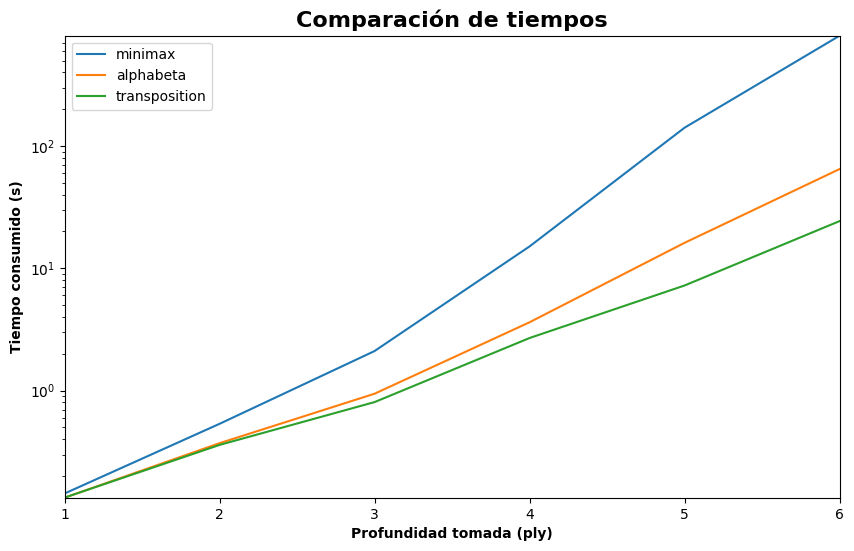

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import json 

# Cargado del archivo
with open('../depths.json', 'r') as file:
    values = json.load(file)



    llaves = ["minimax","alphabeta", "transposition"]
    lista_minimax = []
    lista_alfabeta = []
    lista_transposition = []

    # Itero sobre profundidad
    for key, value_1 in values.items():
        #Itero sobre metodologías
        for key, value_2 in value_1.items():
            if llaves[0] == key:
                lista_minimax.append(np.mean(value_2))

            elif llaves[1] == key:
                lista_alfabeta.append(np.mean(value_2))

            else:
                lista_transposition.append(np.mean(value_2))

    profundidad = 6

    # Genero una lista de listas 
    listas = [lista_minimax, lista_alfabeta, lista_transposition]
    for lista in listas:
        print(lista)
    #Genero la figura
    plt.figure(figsize = (10,6))
    plt.title("Comparación de tiempos", fontweight='bold', fontsize = 16)
    plt.xlabel("Profundidad tomada (ply)",fontweight='bold')
    plt.axis([1, profundidad,min([min(lista)for lista in listas]), max([max(lista)for lista in listas])])
    plt.xticks([i for i in range(1, profundidad +1)])
    plt.ylabel("Tiempo consumido (s)", fontweight='bold')
    plt.yscale('log')
    for index, lista in enumerate(listas):
        plt.plot(list(range(1,profundidad+1)), lista, label = llaves[index])
    plt.legend()


#### **2.PRUEBAS CON SEMILLAS DISTINTAS**

Con voluntad de evaluar cuantitativamente los resultados arrojados por parte de Pacman, atenderemos a la ejecución del código bajo diez semillas distintas como son las que siguen:

$$Seeds = [912, 871, 3199, 3471, 2207, 1710, 1852, 2536, 581, 3333]$$


Para cada una de las  semillas se elaborará un semiapartado componente en una serie de puntos como son los que siguen:

1. Puntuación
2. Estado final 
3. Tiempo consumido 


Cabe señalar que la configuración empleada para desempeñar la prueba se presentará como el uso combinado de Alpha-Beta y la Tabla de Transposición.

#####   **<u>Seed 912</u>**

1. Puntuación $\rightarrow$ 1961 puntos

2. Estado final $\rightarrow$ win

3. Tiempo consumido $\rightarrow$ 15.079 s

#####   **<u>Seed 871</u>**
 
1. Puntuación $\rightarrow$ 864

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 10.01 s

#####   **<u>Seed 3199</u>**

1. Puntuación $\rightarrow$ 1714

2. Estado final $\rightarrow$ win

3. Tiempo consumido $\rightarrow$ 9.627323865890503

#####   **<u>Seed 3471</u>**

1. Puntuación $\rightarrow$ 453

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 5.883488178253174

#####   **<u>Seed 2207</u>**

1. Puntuación $\rightarrow$ 524

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 7.363305568695068

#####   **<u>Seed 1710</u>**

1. Puntuación $\rightarrow$ 858

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 10.581985473632812

#####   **<u>Seed 1852</u>**

1. Puntuación $\rightarrow$ -177

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 4.405104398727417

#####   **<u>Seed 2536</u>**

1. Puntuación $\rightarrow$ 1077

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 9.871320009231567

#####   **<u>Seed 581</u>**

1. Puntuación $\rightarrow$ 1769

2. Estado final $\rightarrow$ win

3. Tiempo consumido $\rightarrow$ 13.471442699432373

#####   **<u>Seed 3333</u>**

1. Puntuación $\rightarrow$ 62

2. Estado final $\rightarrow$ lose

3. Tiempo consumido $\rightarrow$ 6.8131937980651855

#####   **CIERRE**


Como producto de los resultados anteriores podemos extraer una pareja de  métricas en representación del **win-rate** y la **puntuación media** obtenidos para las diez partidas jugadas. A su vez, cabe señalar que el espacio muestral generado para los estados finales se codifica como una cadena binaria $S$ tal que las victorias se representen como un $1$ y las derrotas como un $0$:

$$S = \left\{1,0,1,0,0,0,0,0,1,0\right\}$$


$$\text{Win-Rate} = \frac{1}{|S|}\sum_{i = 1}^{|S|} S_i = \frac{1}{3}$$
<br><br>


$$\text{puntuacion partida} = \left\{1961, 864, 1714, 453, 524, 858, -177, 1077, 1769, 62 \right\}$$
$$\text{Puntuación media} = \frac{1}{\text{total partidas}} \sum_{i = 1}^{10} \text{(puntuacion partida)}_i = 910.5\ puntos $$